In [1]:
import utils
import skimage
import skimage.morphology
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def fill_holes(im: np.ndarray, starting_points: list, num_iterations: int) -> np.ndarray:
    """
        A function that takes a binary image (im),  and a set of points 
        indicating position of holes, and fills the holes.

        args:
            im: np.ndarray of shape (H, W) with boolean values (dtype=np.bool)
            starting_points: list of list containing starting points (row, col). Ex:
                [[row1, col1], [row2, col2], ...]
            num_iterations: integer defining the number of iterations to apply the 
                            hole filling algorithm
        return:
            (np.ndarray) of shape (H, W). dtype=np.bool
    """
    ### START YOUR CODE HERE ### (You can change anything inside this block)
    # You can also define other helper functions
    structuring_element = np.array([
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]
    ], dtype=bool)
    X = np.zeros_like(im) # .astype(np.int32)
    for row, col in starting_points:
        X[row, col] = 1
    for k in range(num_iterations):
        X = np.logical_and(skimage.morphology.binary_dilation(X, structuring_element), ~im)
    im = np.logical_or(X, im)
    result = im.copy()
    return result
    ### END YOUR CODE HERE ###

Reading image: images\balls-with-reflections.png
Saving image to: image_processed\balls-with-reflections-filled.png


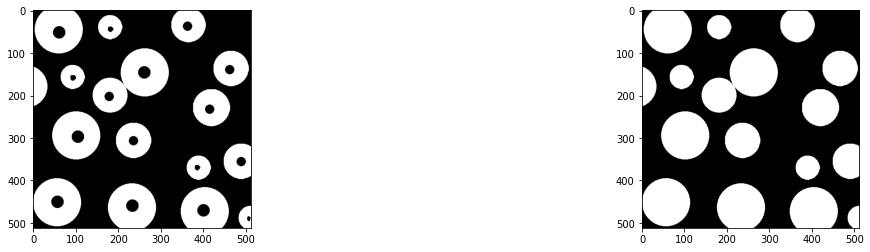

In [3]:
if __name__ == "__main__":
    im = utils.read_image("balls-with-reflections.png")
    binary_image = im != 0
    starting_points = [ # (row, column)
        [51, 64],
        [44, 180],
        [35, 365],
        [156, 94],
        [141, 264],
        [138, 467],
        [198, 180],
        [229, 413],
        [294, 103],
        [302, 230],
        [368, 388],
        [352, 489],
        [454, 57],
        [457, 236],
        [469, 400],
        [489, 506]
    ]
    num_iterations = 30

    result = fill_holes(binary_image, starting_points, num_iterations)

    assert im.shape == result.shape, "Expected image shape ({}) to be same as resulting image shape ({})".format(
            im.shape, result.shape)
    assert result.dtype == np.bool, "Expected resulting image dtype to be np.bool. Was: {}".format(
            result.dtype)

    result = utils.to_uint8(result)
    utils.save_im("balls-with-reflections-filled.png", result)
    
    plt.figure(figsize=(20, 4))
    plt.subplot(1, 2, 1) 
    plt.imshow(im, cmap='gray')
    plt.subplot(1, 2, 2) 
    plt.imshow(result, cmap='gray')